#### **Test et révision Ising**

In [3]:
import sys
sys.path.append("src")

from gibbs import gibbs_sampler_ising
from abc_reject import ABC_reject_final
from mcmc_abc import mcmc_abc
#from utils import sufficient_statistic

In [12]:
X = gibbs_sampler_ising(alpha=0.5, beta=1.0, N=10, iterations=5)
print(X)

[[1 1 1 1 0 0 0 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 1 1]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### **Q.1 Gibbs Sampling**


Le Gibbs sampling ets une méthode de Monte Carlo par chaîne de Markov (MCMC) utilisée ici pour simuler une grille selon p(x|α,β), en :

1. Choisissant un pixel xi,
2. Mettant à jour sa valeur selon sa loi conditionnelle trouvée,
3. Répétant pour tous les pixels, tout cela sur plusieurs itérations

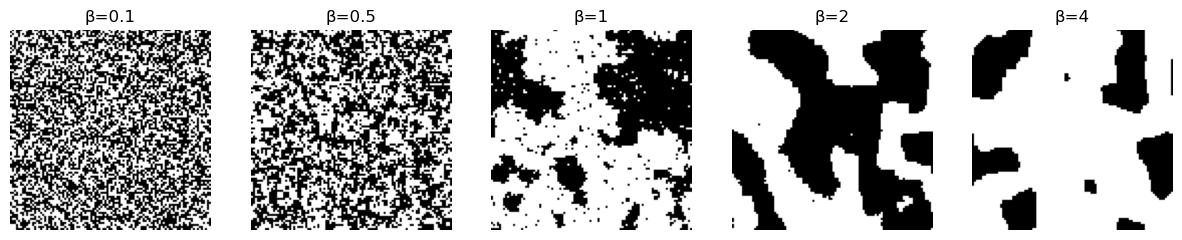

In [13]:
def gibbs_sampler_ising(alpha, beta, iterations, N):

    X = np.random.choice([0,1], size = (N,N))

    for it in range(iterations):        # Iteration numéro it du Gibbs Sampler
        for i in range(N):              # On parcourt la grille ligne par ligne
            for j in range(N):          # Puis, on parcourt la grille colonne par colonne
                
                voisins = [X[i,(j-1)%N], X[i,(j+1)%N], X[(i-1)%N,j], X[(i+1)%N,j]]
                voisin_1 = sum(voisins)

                p1 = np.exp(alpha + beta*voisin_1)
                p0 = np.exp(beta*(4 - voisin_1))
                p = p1 / (p0 + p1)

                X[i,j] = np.random.rand() < p
    
    return X

def gibbs_sampler_ising_bis(alpha, beta, N, iterations):
    
    X = np.random.choice([0,1], size=(N,N))     # Initialisation aléatoire d'un point sur une grille en 2D,  N x N

    for it in range(iterations):                # Nombre de fois où on modifie notre grille (atteindre une situation de convergence suffisante)
        for i in range(N):
            for j in range(N):
                voisins = [
                    X[(i-1)%N,j], X[(i+1)%N,j],                  # Sur une grille 2D, chaque cellule a 4 voisins (Hypothèse de 'conditions aux bords périodiques')
                    X[i,(j-1)%N], X[i,(j+1)%N]
                ]
                sum_voisins_1 = sum(voisins)                     # Voisins_1 = nombre de voisins qui prennent la valeur 1
                sum_voisins_0 = 4 - sum_voisins_1                 

                proba_1 = np.exp(alpha + beta*sum_voisins_1)        
                proba_0 = np.exp(beta*sum_voisins_0)
                p = proba_1 / (proba_1 + proba_0)

                # Mise à jour du site (i,j)
                X[i,j] = np.random.rand() < p

    return X

alpha = 0.0
beta_values = [0.1, 0.5, 1, 2, 4]
iterations = 100
N = 50

# Affichage graphique :

fig, axes = plt.subplots(1, len(beta_values), figsize = (15,4))

for index, beta in enumerate(beta_values):
    final_state = gibbs_sampler_ising(alpha, beta, N, iterations)
    axes[index].imshow(final_state, cmap='gray')
    axes[index].set_title(f'β={beta}')
    axes[index].axis('off')


#### **Q.2 : ABC Reject**

In [ ]:
def sufficient_statistic():
    return None

def abc_reject(N, iterations):

    alpha_ini = np.random.uniform(-1,2)
    beta_ini = np.random.uniform(0,2)

    Xobs = gibbs_sampler_ising(alpha_ini,beta_ini,N, iterations)

    for it in range